# Сборный проект

**Цель**

нужно выявить для интернет-магазина "Стримчик" определяющие успешность игры закономерности по данным до 2016 года. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Используем данные до 2016 года, чтобы рассчитать рекламную кампанию на 2017 год. Ищем принципы работы с данными, чтобы прогнозировать продажи на любой год в принципе.

## Шаг 1. Открытие файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Шаг 2. Подготовка данных

- Заменить названия столбцов;
- Преобразовать данные в нужные типы;
- Обработать пропуски при необходимости;
- Посчитать суммарные продажи во всех регионах.

In [3]:
#Уберем заглавные буквы из названия столбцов
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':"genre", 
                     'NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales', 'Other_sales':'other_sales', 
                     'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [4]:
#Посмотрим на пропуски
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
print(data['name'].sort_values().unique())
print()
print(data['year_of_release'].sort_values().unique())
print()
print(data['user_score'].sort_values().unique())
print()
print(data['critic_score'].sort_values().unique())

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 

Строки с пропуском названия игр и годом издания - удаляем 

*Пропуски в рейтингах заполним 0, слишком много пропусков, чтобы заполнять их медианым или средним значениями. к тому же, судя по годам издания игр, возможно, что в то время не проводились оценки игр*

In [6]:
print(data[data['user_score'] == 'tbd']['user_score'].count(), data['user_score'].count())

2424 10014


tbd - 14% всех данных в столбце  'user_score'. Слишком много чтобы удалять. заменим tbd на заглушки

In [7]:
data = data.dropna(subset=['name'])

data['year_of_release'] = data['year_of_release'].fillna(0)
data = data.query('year_of_release != 0')

data['user_score'] = data['user_score'].fillna(-1)

data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score']= data['user_score'].astype('float')

print(data['user_score'].unique())

data['critic_score'] = data['critic_score'].fillna(-1)
print(data['critic_score'].unique())

[ 8.  -1.   8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
  5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7  2.2
  2.   9.5  2.1  3.6  2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1  0.3
  1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7]
[76. -1. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [8]:
#Переведем данные в нужный формат
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


None

рейтинги переводим в int, тк нужно будет считать корреляцию, и кластеризируем

In [9]:
print(data['rating'].unique())
print('Пропуски:', data['rating'].isna().sum())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Пропуски: 6676


In [10]:
#переведем рейтинг ESRB в цифровой формат
def find_rating(rating):
    if rating == 'E': 
        return 'everyone'
    if rating == 'K-A': 
        return 'kids to adults'
    if rating == 'E10+': 
        return 'everyone 10+'
    if rating == 'EC': 
        return 'early childhood'
    if rating == 'T': 
        return 'teens'
    if rating == 'M': 
        return 'Mature 17 +'
    if rating == 'AO': 
        return 'adults only'
    else:
        return 'no rating'
       
   

data['rating'] = data['rating'].apply(find_rating)

Посчитаем сумарные продажи во всех регионах

In [11]:
def total_sales(sale_1, sale_2, sale_3, sale_4):
    result = sale_1 + sale_2 + sale_3 + sale_4
    return result

data.insert(8, 'total_sales', total_sales(data['na_sales'], data['eu_sales'], data['jp_sales'], data['other_sales']))

display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,everyone
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,no rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,everyone
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,everyone
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.0,-1.0,no rating
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,no rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,-1.0,-1.0,no rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,no rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,-1.0,-1.0,no rating


## Шаг 3. Исследовательский анализ данных

3.1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

3.2. Как менялись продажи по платформам?

3.3. Посмотреть на глобальные продажи игр в разбивке по платформам.

3.4.  Какие платформы лидируют по продажам, растут или падают? 

3.5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

3.6. Посмотритеть на общее распределение игр по жанрам

### 3.1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

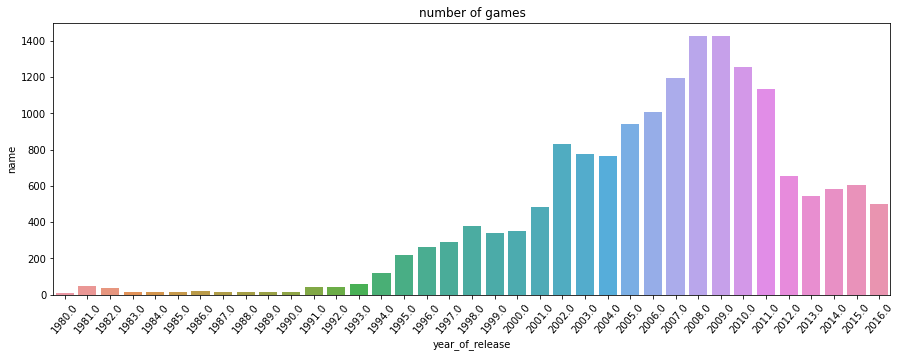

In [12]:
data_1 = data[['name', 'year_of_release']].groupby('year_of_release').agg('count').\
                                  sort_values(by='year_of_release', ascending=False).reset_index()
fig = plt.figure()

sns.barplot(x='year_of_release', y='name', data=data_1)
plt.xticks(rotation=50)
plt.title('number of games')
fig.set_figheight(5)
fig.set_figwidth(15);

с конца 1980-ых годов начался стабильный рост количества издаваемых игр. c 2005 - 2011 был золотой век игр, после 2011 издаваемых игр стало резко меньше.

### 3.2. Как менялись продажи по платформам?

In [13]:
data_top_1994 = data[data['year_of_release'] >= 1994]

display(data_top_1994[['platform', 'total_sales']].groupby('platform').agg('sum').\
        sort_values(by='total_sales', ascending=False).head(10));

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


### 3.3. Возьмем первые 5 платформ и построим распределение по годам

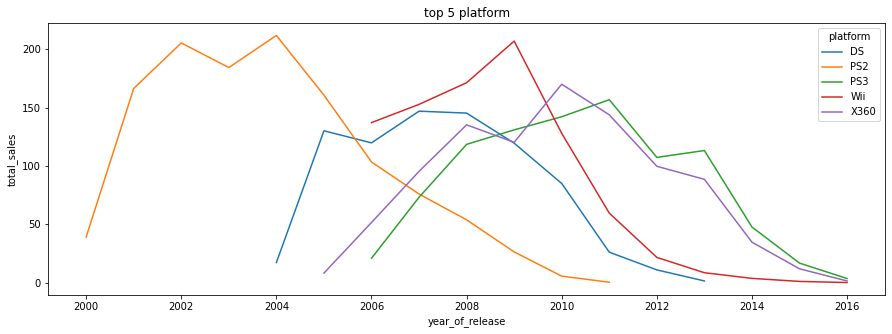

In [14]:
#создадим сводную таблицу с 5 платформами c 1994 

data_top_1994 = data_top_1994.query('platform == "PS2" or platform == "PS3" or \
platform == "Wii" or platform == "DS" or platform == "X360"').reset_index()

data_top_1994 = data_top_1994.pivot_table(index=('platform', 'year_of_release'), \
                                                                          values='total_sales', aggfunc='sum').reset_index()


fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
sns.lineplot(data=data_top_1994, x="year_of_release", y="total_sales", hue="platform")
plt.title('top 5 platform');

In [15]:
data_platforms_lifes = data.pivot_table(index=('platform'), values='year_of_release', aggfunc='nunique')
display(data_platforms_lifes.sort_values(by='year_of_release', ascending=False))
display(data_platforms_lifes.median())

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


year_of_release    7.0
dtype: float64

Посчитаем за какой характерный срок появляются новые и исчезают старые платформы. Берем инф по всем платформам

в среднем платформы "живут" 7  лет

In [16]:
#Беру данные за актуальный период - 4 года. Данные с 2013 года
data_current_period = data[data['year_of_release'] >= 2013]

### 3.4. Какие платформы лидируют по продажам, растут или падают?

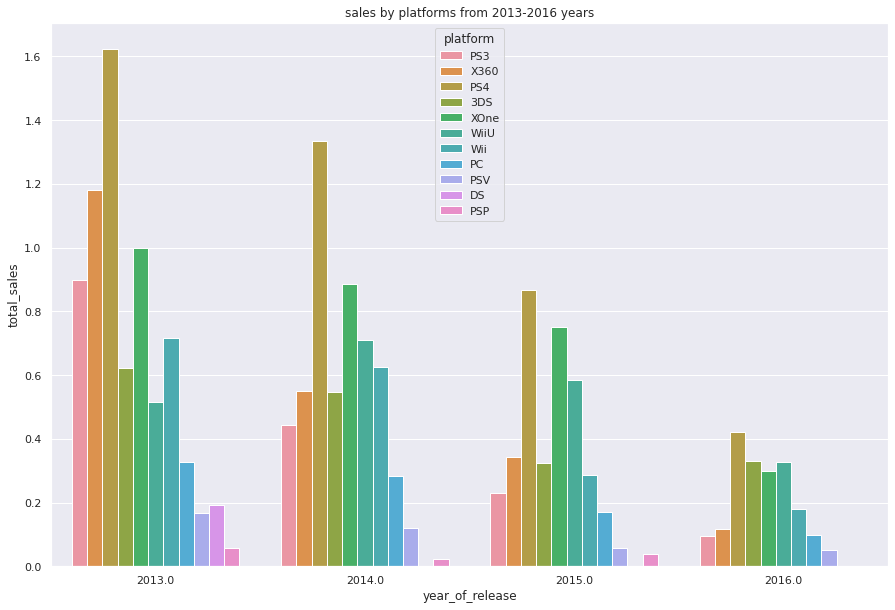

In [17]:
sns.set(rc={'figure.figsize':(15,10)});
sns.barplot(x='year_of_release', y='total_sales', data=data_current_period, ci=None, hue='platform')
plt.title('sales by platforms from 2013-2016 years');

PS4 явный лидер во всех годах, но PS3 также популярен

Wii "зашел" на рынок очень агресивно, но долго свои позиции сдерживать не смог. 

X360  появился в самый "разгар" и показал себя очень уверено, возможно спад Wii и DS как раз и были связаны с появлением на рынке нового X360.

Xone занимает очень уверенные позиции, и в 2015 и 2016 году почти догнал PS4

3DS - стабилен во все года

Построим график «ящик с усами»

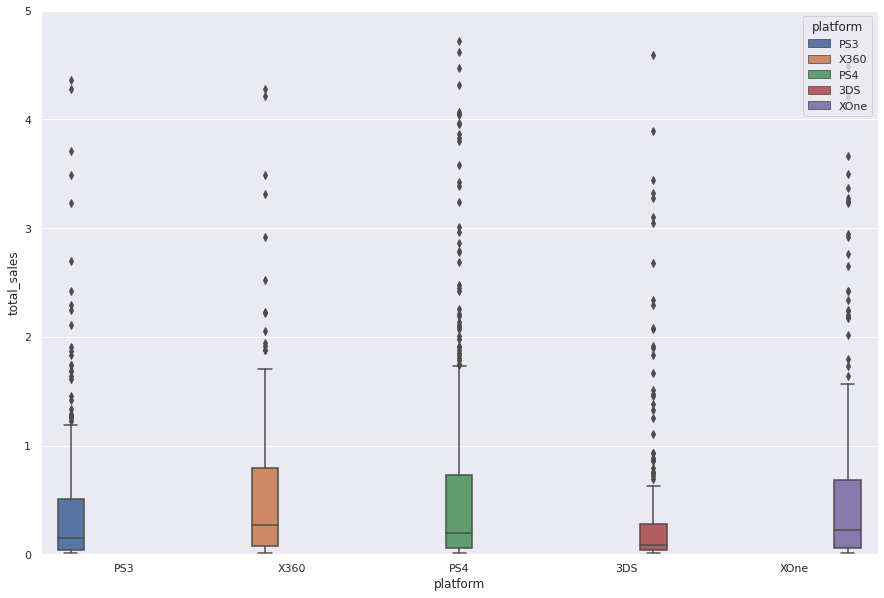

In [18]:
data_current_period_top_5 = data_current_period.query('platform == "PS4" or platform == "PS3" or \
platform == "X360" or platform == "XOne" or platform == "3DS"').reset_index()

sns.boxplot(x='platform', y='total_sales', data=data_current_period_top_5, hue='platform')
plt.ylim(0, 5);

по медианным продажам можно сказать, что:

Х360 с 5 места, оказывается на 1,

2 - XOne, 

3 - PS4, 

4 - PS3, 

5 - 3DS


### 3.5. Влияение на продажи внутри каждой из 5 платформ отзывов пользователей и критиков

**PS4**

In [19]:
data_current_period_top_5 = data_current_period_top_5[data_current_period_top_5['user_score'] != -1]  #Избавляемся от заглушек
data_current_period_top_5 = data_current_period_top_5[data_current_period_top_5['critic_score'] != -1]

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


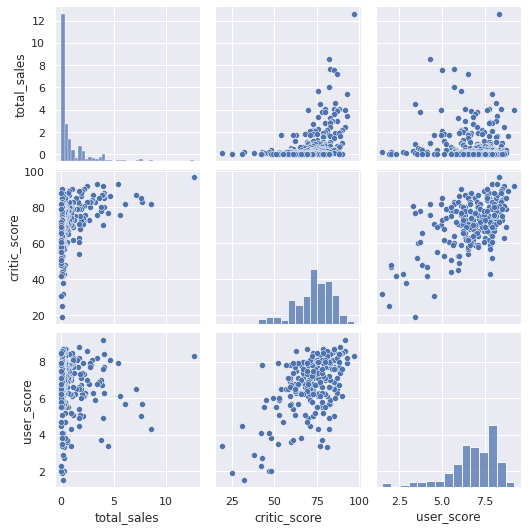

In [20]:
display(data_current_period_top_5.query('platform == "PS4"')[['total_sales', 'critic_score','user_score']].corr())

sns.pairplot(data_current_period_top_5.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']]);

**X360**

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.006238
critic_score,0.350345,1.000000,0.520946
user_score,-0.006238,0.520946,1.000000


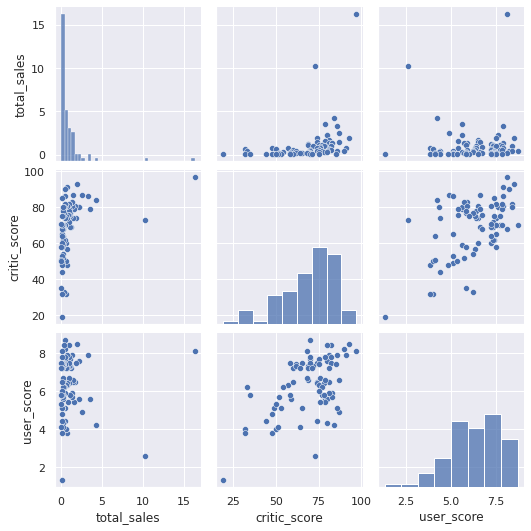

In [21]:
display(data_current_period_top_5.query('platform == "X360"')[['total_sales', 'critic_score','user_score']].corr())

sns.pairplot(data_current_period_top_5.query('platform == "X360"')[['total_sales', 'critic_score', 'user_score']]);

**PS3**

,total_sales,critic_score,user_score
total_sales,1.000000,0.333807,0.022691
critic_score,0.333807,1.000000,0.599920
user_score,0.022691,0.599920,1.000000


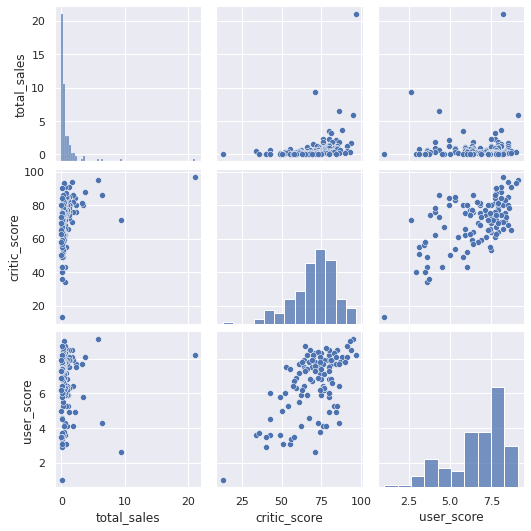

In [22]:
display(data_current_period_top_5.query('platform == "PS3"')[['total_sales', 'critic_score','user_score']].corr())

sns.pairplot(data_current_period_top_5.query('platform == "PS3"')[['total_sales', 'critic_score', 'user_score']]);

**XOne**

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


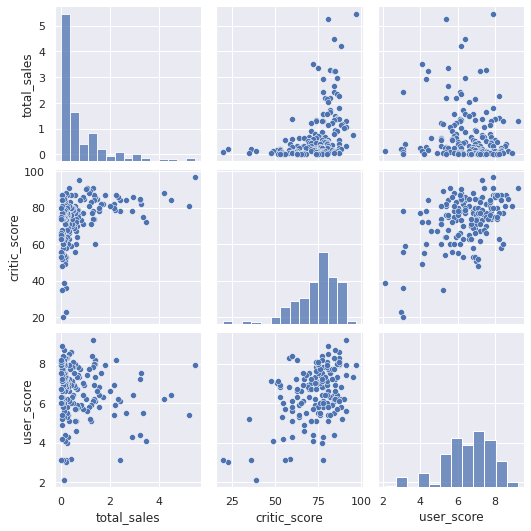

In [23]:
display(data_current_period_top_5.query('platform == "XOne"')[['total_sales', 'critic_score','user_score']].corr())

sns.pairplot(data_current_period_top_5.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']]);

**3DS**

,total_sales,critic_score,user_score
total_sales,1.000000,0.339235,0.272990
critic_score,0.339235,1.000000,0.769536
user_score,0.272990,0.769536,1.000000


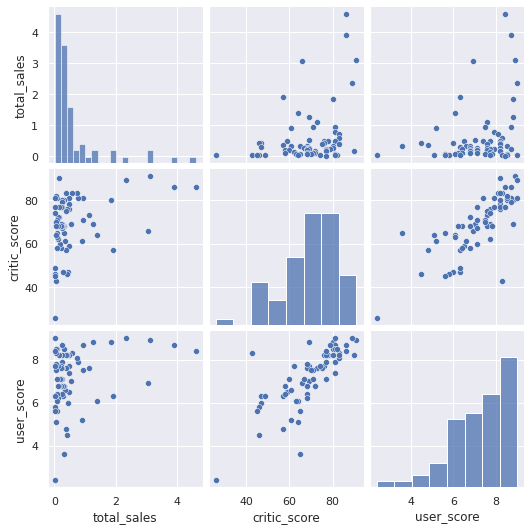

In [24]:
display(data_current_period_top_5.query('platform == "3DS"')[['total_sales', 'critic_score','user_score']].corr())

sns.pairplot(data_current_period_top_5.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']]);

У всех платформ средняя связь между рейтингом критиков и пользователей. 

Связи между рейтингом пользователей и продажами нет у всех платформ. 

Связь между рейтингом критиков и продажами слабая также у всех платформ.

### 3.6. Общее распределение игр по жанрам

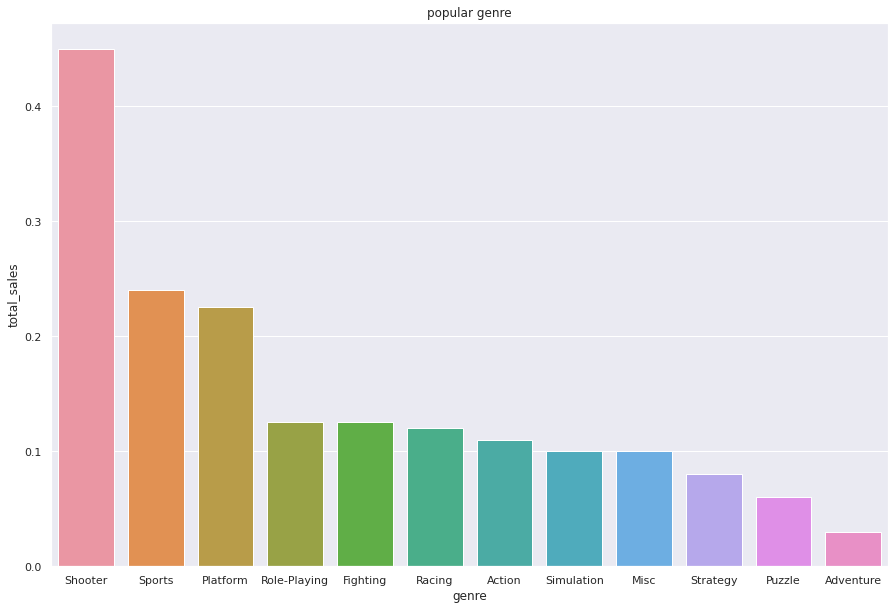

In [25]:
data_genre = data_current_period[['genre', 'total_sales']].groupby('genre').agg('median').\
sort_values(by='total_sales', ascending=False).reset_index()
sns.barplot(x='genre', y ='total_sales', data = data_genre)

plt.title('popular genre');

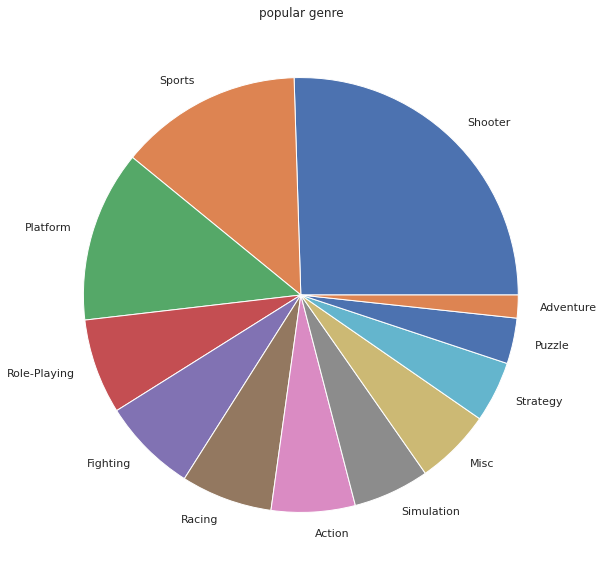

In [26]:
plt.title('popular genre')
plt.pie(x = data_genre['total_sales'], labels = data_genre['genre']);

Самые популярные жанры: стрелялки, sports, platform, rpg, fighting. Очевидное превосходство у Стрелялок 


## Шаг 4. Составление паспорта пользователя

Регионы: NA, EU, JP.

- Какие самые популярные платформы (топ-5)?
- Какие самые популярные жанры (топ-5)?
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1. Топ 5 платформ в регионах

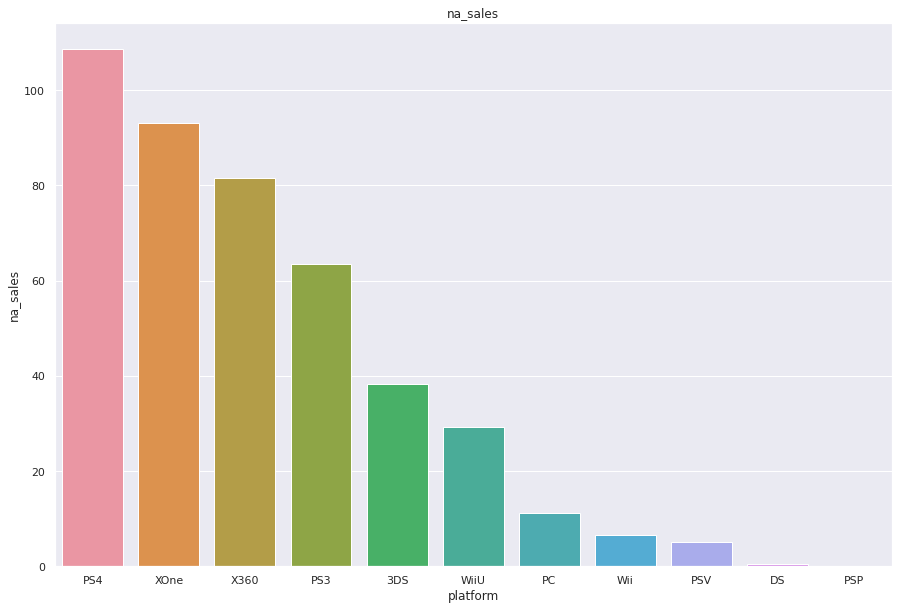

In [27]:
data_na = data_current_period[['platform', 'na_sales']].groupby('platform').sum().sort_values(by='na_sales', ascending=False).reset_index()
plt.title('na_sales')
sns.barplot(x='platform', y='na_sales', data=data_na);

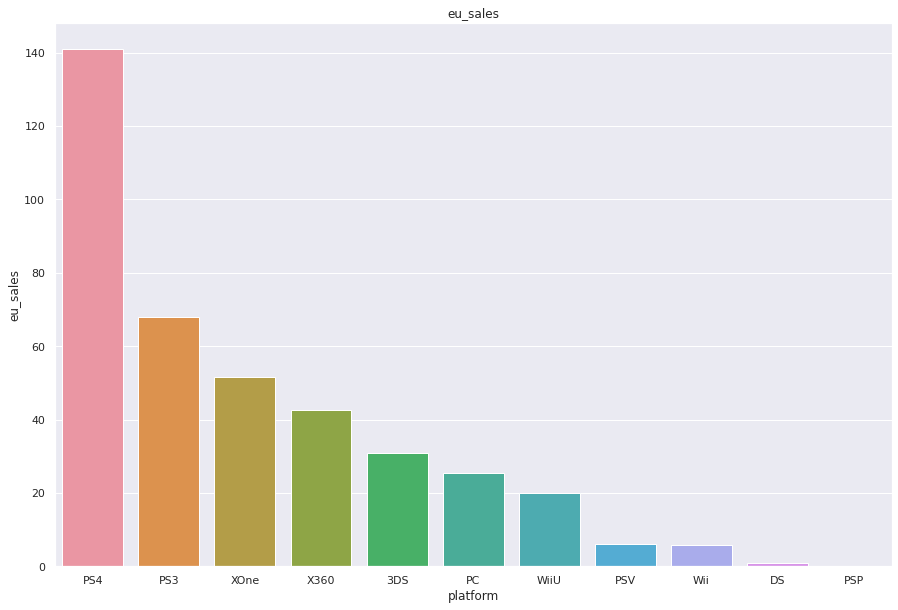

In [28]:
data_eu = data_current_period[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by='eu_sales', ascending=False).reset_index()
plt.title('eu_sales')
sns.barplot(x='platform', y='eu_sales', data=data_eu);

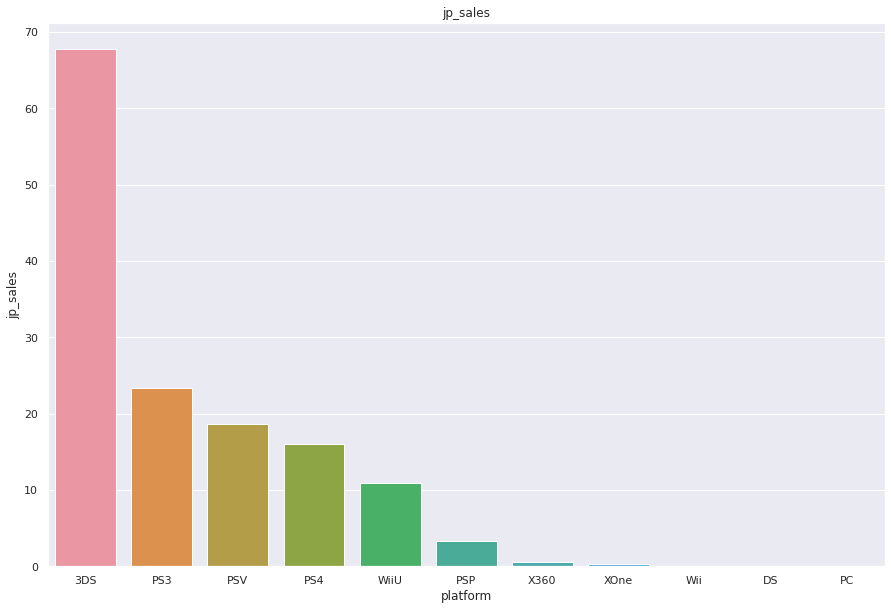

In [29]:
data_jp = data_current_period[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by='jp_sales', ascending=False).reset_index()
plt.title('jp_sales')
sns.barplot(x='platform', y='jp_sales', data=data_jp);

В Северной Америке самая популярная приставка PS4, следом американская приставка Х360 и 3DS. 

В Европе играют больше всего. И снова PS4 лидирует, следом XOne и 3DS.

В Японии играют меньше всего, пользуется явной популярностью маленькие игровые консоли 3DS. На втором месте PSV, WiiU. В Японии явно любят переносные консоли 

### 4.2. Топ 5 жанров в регионах

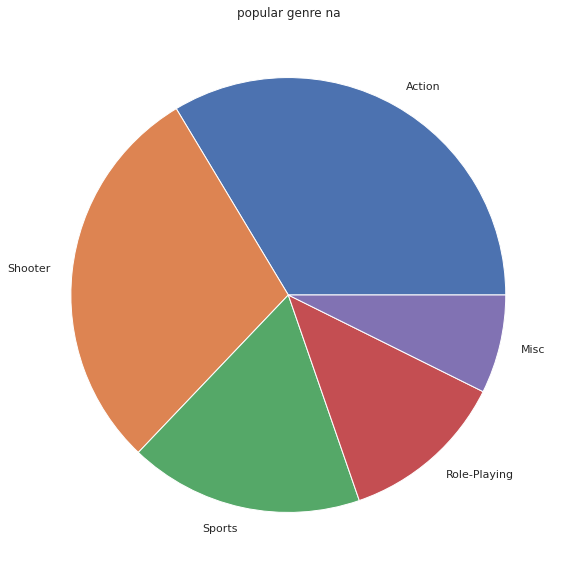

In [30]:
data_genre_na = data_current_period[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales', ascending=False).head(5).reset_index()

plt.title('popular genre na')
plt.pie(x = data_genre_na['na_sales'], labels = data_genre_na['genre']);

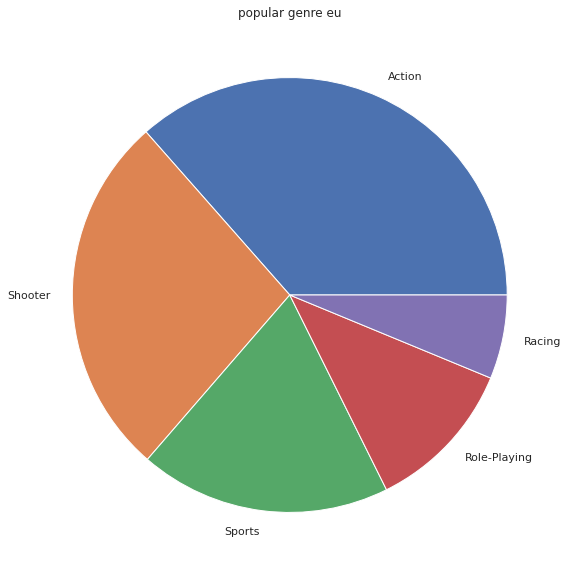

In [31]:
data_genre_eu=data_current_period[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales', ascending=False).head(5).reset_index()
plt.title('popular genre eu')
plt.pie(x = data_genre_eu['eu_sales'], labels = data_genre_eu['genre']);

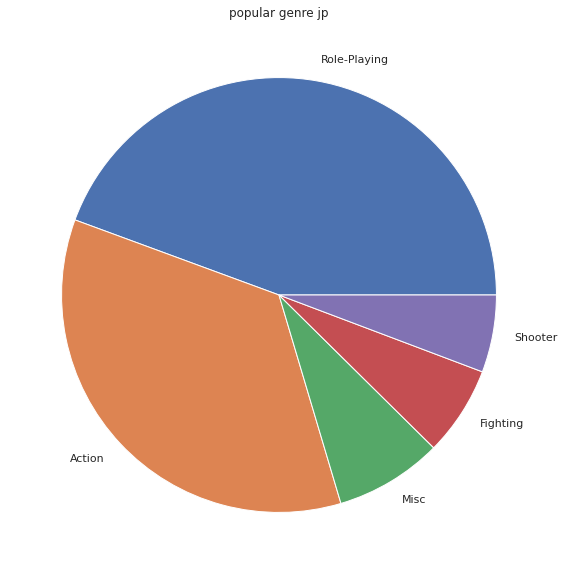

In [32]:
data_genre_jp=data_current_period[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales', ascending=False).head(5).reset_index()
plt.title('popular genre jp')
plt.pie(x = data_genre_jp['jp_sales'], labels = data_genre_jp['genre']);

в Америке и в Европе вкусы пользователей не сильно различаются. Отличается жанр на 5 месте. В Америке любят misc, в европе предпочитают гонки. 

А вот вкусы пользователей из Японии отличаются сильнее. RPG и Action очень популярны в Японии по сравнению с другими жанрами.


### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

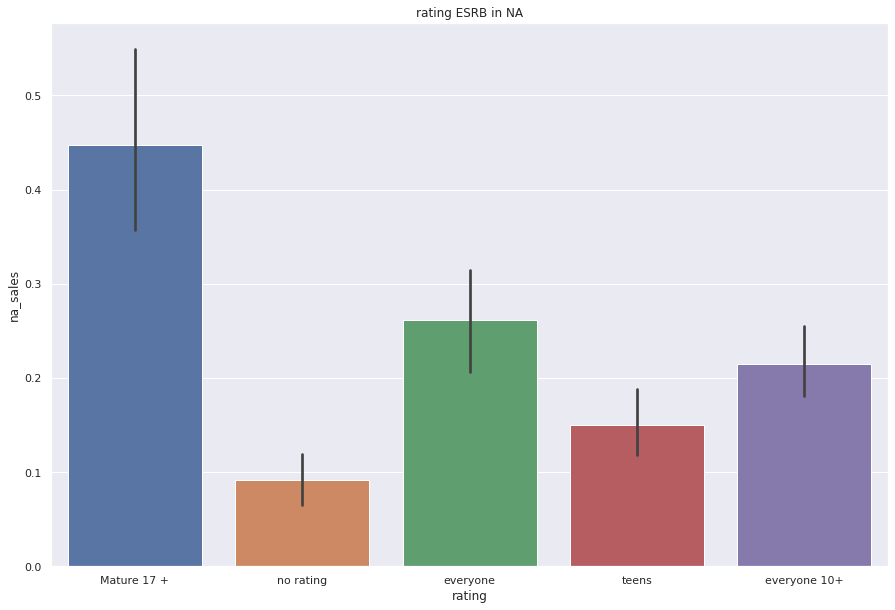

In [33]:
sns.barplot(x='rating', y='na_sales', data=data_current_period)
plt.title('rating ESRB in NA');

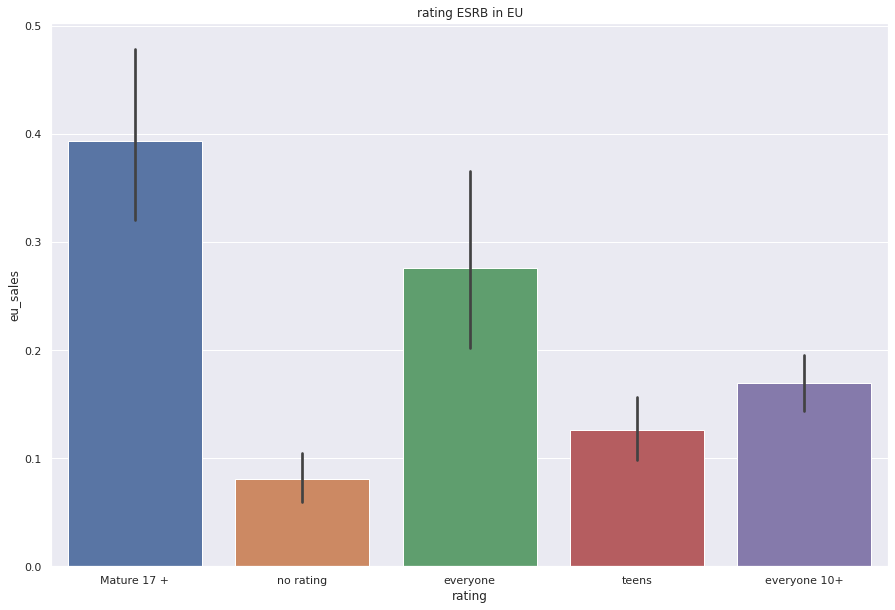

In [34]:
sns.barplot(x='rating', y='eu_sales', data=data_current_period)
plt.title('rating ESRB in EU');

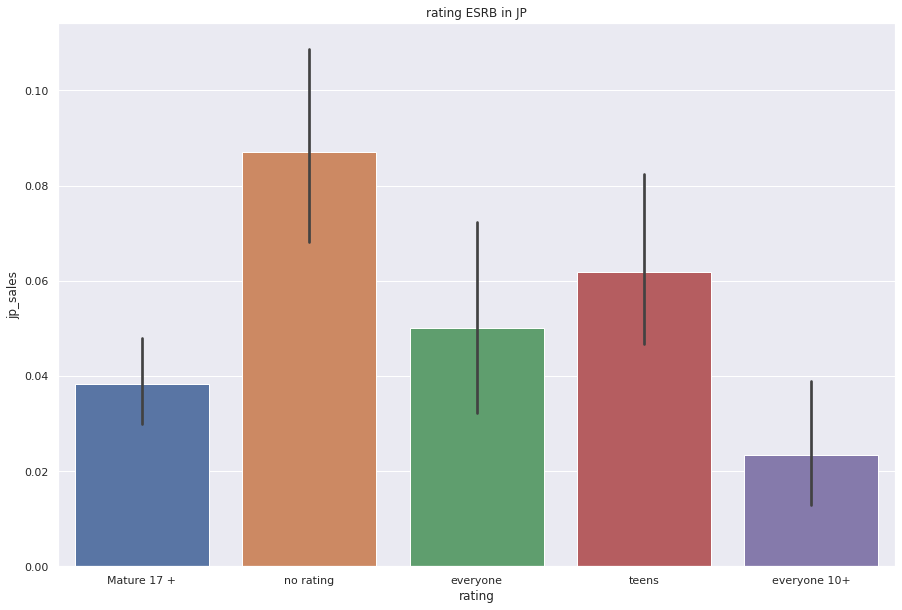

In [35]:
sns.barplot(x='rating', y='jp_sales', data=data_current_period)
plt.title('rating ESRB in JP');

In [36]:
print(data[data['rating'] == 'kids to adults']['rating'].count())
print(data[data['rating'] == 'adults only']['rating'].count())

3
1


*игр с рейтингами 18+ и kids to adults(6+) всего 4, поэтому в графики не попали*

**Выводы по самым популярным рейтингам и платформам**

- В Америке самые популярные игры с рейтингом 17+, игры для всех категорий на 2 месте. 3 место у рейтинга 10+б 4 - teens.

- В Европе аналогичная картина

- В Японии самый популярный жанр без рейтинга, на втором месте teens. Игры для всех как в Америке и Европе на 3 месте 4 место 17+,  4 место 10+. 

**Обычный пользователь:**

В Северной Америки - вероятнее всего человек 17+ лет, играет на PS4 или X360 в экшен, shooter или спортивные игры.

в Европе - человек старше 17 лет, играющий на PS4 или XOne в экшен или shooter

в Японии играют подростки на кончолях в ролки, экшен. 

Можно сделать вывод, что среднестатистический игрок С.Америки и Европы старше и предпочитает более агрессивный контент чем пользователи из Японии.

## Шаг 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action разные.

Проверим первую гипотезу: 

Н0 - Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC **не одинаковые**


In [37]:
a = data_current_period[data_current_period['platform'] == 'PC']['user_score'].astype(float)
b = data_current_period[data_current_period['platform'] == 'XOne']['user_score'].astype(float)

Проверим распределение на нормальность на всякий случай)

In [38]:
means_a = []
means_b = []

for _ in range(1000):
    sample_a = np.random.choice(a, size=len(a), replace=True)
    sample_b = np.random.choice(b, size=len(b), replace=True)
    means_a.append(np.mean(sample_a))
    means_b.append(np.mean(sample_b))

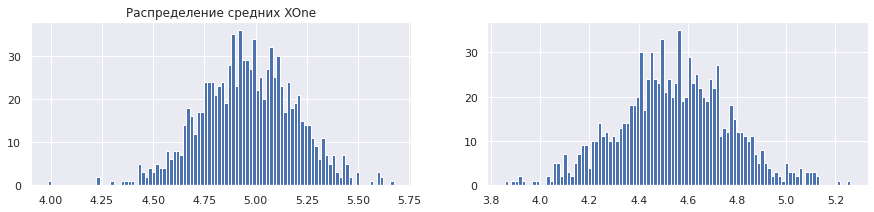

In [39]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

ax1[0].set_title('Распределение средних PC')
ax1[0].hist(means_a, 100)

ax1[0].set_title('Распределение средних XOne')
ax1[1].hist(means_b, 100);

используем гипотезу о равенстве средних двух генеральных совокупностей

In [40]:
alpha = .05
result = st.ttest_ind(a, b, equal_var=False)
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.19564149183065668
Не получилось отвергнуть нулевую гипотезу


__________

Проверим вторую гипотезу:

Н0 - Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.

Н1 - Средние пользовательские рейтинги жанров Action и Sports  **разные**.


используем гипотезу о равенстве среднего ген. совокупности некоторому значению. Некоторое значение для нас это средний рейтинг жанра Actioon (**??? верно**)

In [41]:
a = data_current_period[data_current_period['genre'] == 'Action']['user_score'].astype(float)
b = data_current_period[data_current_period['genre'] == 'Sports']['user_score'].astype(float)

In [42]:
alpha = .05
result = st.ttest_ind(a,b, equal_var=False)
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.008445505365573194
Отвергаем нулевую гипотезу


## Шаг 6. Общий вывод

Было проанализировано:
- количество игр выпускаемых каждый год
- выбраны самые популярные платформы
- определено влияние отзывов и рейтингов на продажи
- опеределены самые прибыльные жанры
- составлен портрет пользователя
- выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- выявлено, что средние пользовательские рейтинги жанров Action и Sports разные.


Таким образом, популярность того  или иного продукта может быть определена районом, жанром, платформой и т.д.

для игр для людей страше 17+ идеальная зона - Америка, Европа. платформа Х360, PS4 соответсвенно 
для Японии лучше менее жестокие жанры и на 3DS. 

самые "надежные" платформы остаются в 2017 г. Х360 и PS4. Универсальные жанры: action, RPG, sport.

**Самые прибыльные жанры: Action, RPG**. RPG особенно в Японии. В Европе и С.Америке еще стоит добавить Shooter

**Самые прибыльные платформы: 3DS, PS4, X360**. Для Японии характерна любовь к консолям, в С.Америке и Европе PS4, X360/Xone